In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

# Load Data

In [3]:
df_path = 'salaries-by-college-type.csv'
df_type = pd.read_csv(df_path)
df_type.head()

,School_Name,School_Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200,126000,76800.0,99200,168000,220000.0
1,California Institute of Technology (CIT),Engineering,75500,123000,NaN,104000,161000,NaN
2,Harvey Mudd College,Engineering,71800,122000,NaN,96000,180000,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400,114000,66800.0,94300,143000,190000.0
4,Cooper Union,Engineering,62200,114000,NaN,80200,142000,NaN


In [4]:
#เนื่องจาก School_Name ไม่มีผลต่อการวิเคราะห์ข้อมูลจากทำการ drop
df = df_type.drop(columns = 'School_Name')
df.head()

,School_Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Engineering,72200,126000,76800.0,99200,168000,220000.0
1,Engineering,75500,123000,NaN,104000,161000,NaN
2,Engineering,71800,122000,NaN,96000,180000,NaN
3,Engineering,62400,114000,66800.0,94300,143000,190000.0
4,Engineering,62200,114000,NaN,80200,142000,NaN


# Data Summarization and Exploration

In [5]:
#บอกจำนวน instant และ feature จากผลลัพธ์จะเห็นว่าทั้งหมดมี instant ทั้งหมด 269 ตัว และมี feature 7 ตัว
df.shape

(269, 7)

In [6]:
#ดูข้อมูลสถิติเบื้องต้น โดยผลลัพธ์ที่ได้จะประกอบไปด้วย จำนวน ค่าเฉลี่ย ส่วนเบี่ยงเบนมาตรฐาน ค่าต่ำสุด ค่าเปอร์เซ็นที่ 25 50 75 และค่าสูงสุดของแต่ละ feature
df.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269.000000,269.000000,231.000000,269.000000,269.000000,231.000000
mean,46068.401487,83932.342007,44250.649351,60373.234201,116275.092937,157705.627706
std,6412.616242,14336.191107,8719.612427,11381.348857,22952.334054,34823.348157
min,34800.000000,43900.000000,22600.000000,31800.000000,60900.000000,87600.000000
25%,42000.000000,74000.000000,39000.000000,53200.000000,100000.000000,136000.000000
50%,44700.000000,81600.000000,43100.000000,58400.000000,113000.000000,153000.000000
75%,48300.000000,92200.000000,47400.000000,65100.000000,126000.000000,170500.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


In [7]:
#เพื่อดูข้อมูลเบื้องต้น ทำให้ทราบว่าข้อมูลมี instant 50 ตัว มี feature 8 ตัว มีข้อมูลที่เป็น float 2 ตัว int 4 ตัว และ object 1 ตัว 
#และสามารถดูได้ว่า feature ใดบ้างที่มี missing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   School_Type                        269 non-null    object 
 1   Starting Median Salary             269 non-null    int64  
 2   Mid-Career Median Salary           269 non-null    int64  
 3   Mid-Career 10th Percentile Salary  231 non-null    float64
 4   Mid-Career 25th Percentile Salary  269 non-null    int64  
 5   Mid-Career 75th Percentile Salary  269 non-null    int64  
 6   Mid-Career 90th Percentile Salary  231 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 14.8+ KB


# Cleaning data by missing

In [8]:
#เพื่อดูว่า feature ใดบ้างที่มี missing จากผลลัพธ์จะเห็นว่า feature 'Mid-Career 10th Percentile Salary' และ 
#'Mid-Career 90th Percentile Salary'มีค่าว่าง 38 ค่า
df.isnull().sum()

School_Type                           0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    38
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    38
dtype: int64

In [9]:
#ให้ใส่ค่า mean ในช่องที่มี missing 
## Mid-Career 10th Percentile Salary
df['Mid-Career 10th Percentile Salary'].fillna((df['Mid-Career 10th Percentile Salary']).mean() , inplace=True)

In [10]:
## Mid-Career 90th Percentile Salary 
df['Mid-Career 90th Percentile Salary'].fillna((df['Mid-Career 90th Percentile Salary']).mean() , inplace=True)

In [11]:
#ใช้คำสั่ง isnull() อีกครั้งเพื่อดูว่ายังมี feature ใดบ้างที่มี missing อยู่ จากผลลัพธ์จะเห็นว่าทุก feature ไม่มี missing
df.isnull().sum()

School_Type                          0
Starting Median Salary               0
Mid-Career Median Salary             0
Mid-Career 10th Percentile Salary    0
Mid-Career 25th Percentile Salary    0
Mid-Career 75th Percentile Salary    0
Mid-Career 90th Percentile Salary    0
dtype: int64

# Cleaning data by nunique

In [12]:
#ให้ลบรายการที่ซ้ำออก เนื่องจากไม่มีค่าซ้ำจึงได้ instant 269 ตัว feature 7 ตัวเท่าเดิม 
df.drop_duplicates(inplace=True)
print(df.shape)

(269, 7)


# Cleaning data by dummy

In [13]:
#ดูว่าแต่ละ feature มี instant ที่ไม่มีแตกต่างกี่ค่า จากผลลัพธ์จะเห็นว่า feature 'School_Type' มีจำนวน instant ที่ไม่มีแตกต่างกัน 5 
#แต่เนื่องจาก School_Type เป็นค่า ground truth จึงไม่ได้ทำเป็น dummy
df.nunique()

School_Type                            5
Starting Median Salary               145
Mid-Career Median Salary             168
Mid-Career 10th Percentile Salary    142
Mid-Career 25th Percentile Salary    178
Mid-Career 75th Percentile Salary    110
Mid-Career 90th Percentile Salary     99
dtype: int64

In [14]:
# School_Type เป็นค่า ground truth
df.head() 

,School_Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Engineering,72200,126000,76800.000000,99200,168000,220000.000000
1,Engineering,75500,123000,44250.649351,104000,161000,157705.627706
2,Engineering,71800,122000,44250.649351,96000,180000,157705.627706
3,Engineering,62400,114000,66800.000000,94300,143000,190000.000000
4,Engineering,62200,114000,44250.649351,80200,142000,157705.627706


In [15]:
# Setting input features x and target output y
x = df.iloc[:,1:] #กำหนดให้ X เก็บทุก instant ยกเว้น feature แรก
y = df['School_Type'] #กำหนดให้ y เก็บทุก instant ใน feature 'School_Type'
n_class = len(np.unique(y)) ; print(n_class)
x.head()

5


,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,72200,126000,76800.000000,99200,168000,220000.000000
1,75500,123000,44250.649351,104000,161000,157705.627706
2,71800,122000,44250.649351,96000,180000,157705.627706
3,62400,114000,66800.000000,94300,143000,190000.000000
4,62200,114000,44250.649351,80200,142000,157705.627706


In [16]:
# Setting input features x and target output y
x = df.iloc[:,1:] #กำหนดให้ X เก็บทุก instant ยกเว้น feature แรก
y = df['School_Type'] #กำหนดให้ y เก็บทุก instant ใน feature 'School_Type'
n_class = len(np.unique(y)) ; print(n_class)
x.head()

5


,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,72200,126000,76800.000000,99200,168000,220000.000000
1,75500,123000,44250.649351,104000,161000,157705.627706
2,71800,122000,44250.649351,96000,180000,157705.627706
3,62400,114000,66800.000000,94300,143000,190000.000000
4,62200,114000,44250.649351,80200,142000,157705.627706


In [17]:
#ทำ scaler
scaler = StandardScaler() 
X_std = scaler.fit_transform(x)

# K-means

In [18]:
#Elbow method 
sse = [] #กำหนด list เปล่าเพื่อใส่ค่า sse
for i in range(1, 13): #เก็บค่า sse แต่ละโมเดลลงใน list ที่สร้างไว้ กำหนดให้ k เป็น 1-12 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0) #define model
    kmeans.fit(X_std) #fit model
    sse.append(kmeans.inertia_) #เก็บค่า sse แต่ละ clusters ใน sse

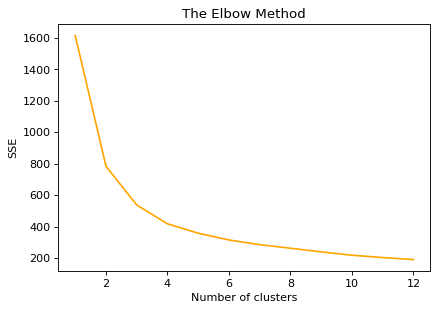

In [19]:
#จากภาพ จำนวน k จะเห็นว่า k=3 มีความเหมาะสมมากที่สุด
plt.figure(figsize=(6, 4), dpi=80)
plt.plot(range(1, 13), sse, color='orange')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [20]:
#ทดลองใช้ โดยกำหนด n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto") #define model 
kmeans.fit(X_std) #fit model

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [21]:
#หา sse
kmeans.inertia_

538.0701586727835

In [22]:
#หา NMI
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,kmeans.labels_) #เทียบค่า ground truth กับค่าที่ได้จากการ predic(fit mobel)

0.2056472709957979

In [23]:
#จากผลลัพธ์จะเห็นว่ามี 3 centroids โดย centroids ที่ 1 feature ที่ 1 คือ 0.0600358
kmeans.cluster_centers_ 

array([[ 0.0600358 ,  0.22771539,  0.14772784,  0.13526989,  0.23722907,
         0.16358212],
       [ 2.05774708,  1.85875995,  1.84266713,  1.98002531,  1.66916948,
         1.58030588],
       [-0.72162231, -0.86828375, -0.76343202, -0.79105895, -0.82056763,
        -0.70075573]])

In [24]:
#เป็นการบอกว่าแต่ละตัวอยู่ cluster ไหน
kmeans.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

# agglomerative

In [25]:
#agglomerative กำหนด n_clusters=3
clustering = AgglomerativeClustering(n_clusters=3, linkage = 'single') #define model 
clustering.fit(X_std) #fit model

AgglomerativeClustering(linkage='single', n_clusters=3)

In [26]:
##evaluation
#หา NMI
normalized_mutual_info_score(y,clustering.labels_) #เทียบค่า ground truth กับค่าที่ได้จากการ predic(fit mobel)

0.06660298824915248

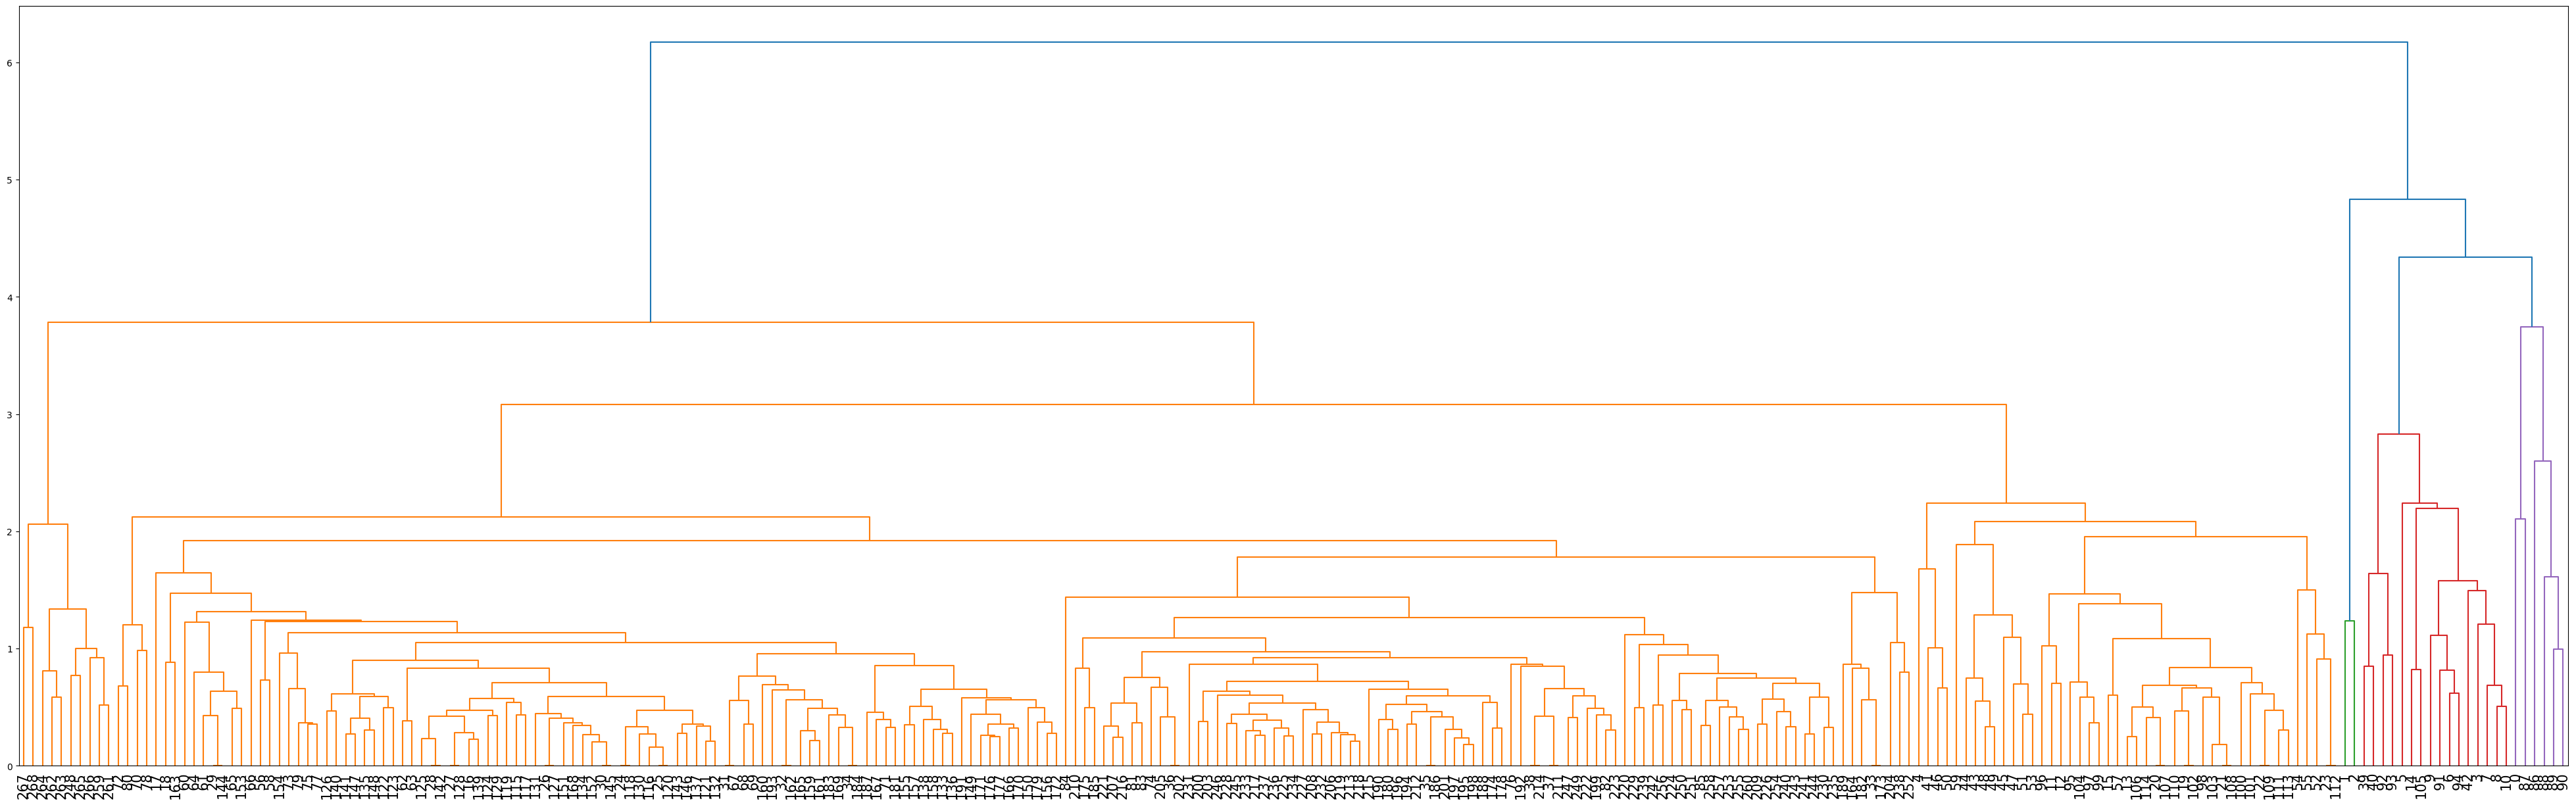

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(facecolor='w', figsize=(50,15))
dendrogram(linkage(X_std, method='average'), leaf_font_size=15)
plt.show()